# CSI 4106 - Introduction to Artificial Intelligence
## Taught by: Dr. Caroline Barrière


## PROJECT 1 - Classification Empirical Study
## Title: Pistachio Classification

### By: Muhammed Melik Izol (300043365), Eric Dam (300012511)
### Group Number: 98

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset


# Section 0: Introduction

Pistachios are a type of cashew and are seeds of pistachio trees.
They originate from Central to Western Asia and are typically used in sweets such as baklava. 

<img src="pistachio_tree.jpg"/>
Figure 1: Pistachio Tree

<img src="pistachio_branch.jpg"/>
Figure 2: Pistachios in a branch

Pistachios have 4 layers to them. 
- outer skin/soft hull (mesocarp)
- hard shell (endocarp)
- seed coat (testa)
- seed (kernel) 
<img src="pistachio_layers.jpg"/>
Figure 3: Pistachio Layers


In this notebook, we will look at two types of pistachios:
- The Siirt Pistachios from Siirt Province located in Eastern Turkey
- The Kirmizi Pistachios from Gaziantep/Sanliurfa Provinces located in South Eastern Turkey 

The differences between these two types of pistachios are their shape, size and the colour of their outer skin.

Siirt pistachios are typically larger in size, more round/circular in shape, and have yellow outer skins. 

Kirmizi pistachios are smaller in size, more slim/cylindrical in shape and have red outer skins. 

(Fun fact: Kirmizi means "red" in Turkish)


<img src="siirt_outer_skin.jpg"/>
Figure 4: Siirt Pistachios with and without their outer skin


<img src="kirmizi_outer_skin.jpg"/>
Figure 5: Kirmizi Pistachios with and without their outer skin

# Section 1: Understanding the classification for the dataset

## a) Classification Type:
The classification is a Binary Classification since there are 2 categories to classify the pistachios as with the given data. The 2 types of pistachios in this dataset are Kirmizi Pistachios and Siirt Pistachios. 

## b) What is the goal? Is this for a particular application? 
The first goal of this project is to familiarize ourselves with various machine learning methods and learn how to do an Emprical Study on a given dataset. 

The goal in picking this particular dataset was:
- To see the application of data analysis/science and machine learning in farming.  
- To get exposed to image classification on the surface. 
- Curiosity as the family of one of the team members has a pistachio tree farm in Sanliurfa Province of Turkey 

This dataset has provided us with images as well as an excel file with pre-defined features and data on the features of the given images. This has given us the option to pick and choose which we would like to use. We were both interested in image classification but following the advice of Dr. Barrière, we opted to use a dataset where both the features and the images were provided. This way we can see how features and data with numbers are produced from an image without having to do the complex work ourselves. 

In [1]:
# General imports of libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


# imported for chart colourings
from matplotlib.patches import Patch


# imported to discretize data
from sklearn.preprocessing import KBinsDiscretizer


# imported to scale data
from sklearn.preprocessing import StandardScaler


# imported to measure accuracy score of models
from sklearn.metrics import accuracy_score


# imported to perform test/train splits on data
from sklearn.model_selection import train_test_split


# Cross Validation imports
from sklearn.model_selection import StratifiedKFold


# Naive Bayes imports
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB


# Logistic Regression imports
from sklearn.linear_model import LogisticRegression


# Multi-Layer Perceptron imports
from sklearn.neural_network import MLPClassifier


# L2 error imports
from sklearn.metrics import mean_squared_error

# Precision/Recall imports
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Confusion Matrix imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Setting the max number of columns that gets displayed to 30
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 10)

In [3]:
# reading the dataset
df = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")

# Section 2: Analysis of Dataset

There are two data sets that we can use. One has 28 features available the other has 16 features available. 

We picked the 28 feature data set as it already encompasses the 16 features and pixel RGB information on top of it. We can always take out features we don't need if necessary. 

In [4]:
# Seeing what the data looks like
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


### Checking general information of dataframe
- It can be seen that there are no null values and so no missing data in the dataset which is good.

- The dataset has 29 columns in total, numbered 0-28. One of which called "Class" is the classification column. The remaining 28 columns are all features of the dataset. 

- The data type of the features are all float with the exception of "Area" and "Convex_Area" columns, which are int. 

- Looking through the data, it is clear that all the features are continuous

- As mentioned earlier, this is a binary classification since there are only two types of pistachios in the dataset which are Kirmizi Pistachios and Siirt Pistachios. 

- There are a total of 2148 images present in the dataset, each corresponding to one row of data. 

- Out of these 2148 rows of data, 1232 belong to Kirmizi Pistachios and 916 belong to Siirt Pistachios. 

- Kirmizi Pistachios make up about 57.4% of the data and Siirt Pistachios make up about 42.6% of the data, which means our data is imbalanced

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [6]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [7]:
# Columns that will be our features
FEATURES = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']

# The column we'll be predicting for
TARGET = "Class"

In [8]:
description = df.describe()
description

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239,218.067505,207.973008,191.995311,21.380084,22.591454,22.427056,-0.735243,-0.615580,-0.367142,3.054000,2.903015,2.940572
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840,10.793178,12.073221,13.030505,3.127813,3.622222,3.926325,0.384584,0.389219,0.426964,0.733993,0.651383,0.750171
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,167.191300,162.623000,146.787600,10.611100,11.985400,11.197100,-1.931600,-1.658200,-2.348600,1.662400,1.665500,1.522500
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000,211.608950,200.437100,182.930675,19.253550,20.036675,19.722425,-0.990900,-0.875975,-0.645800,2.509700,2.437400,2.449425
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100,219.529800,208.885000,192.036350,21.425100,22.523250,22.276900,-0.756600,-0.653050,-0.424550,2.941750,2.807050,2.783350
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300,225.941500,216.494700,201.097725,23.695900,25.241900,25.140125,-0.502500,-0.405000,-0.158400,3.446500,3.247400,3.224650
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000,241.275200,240.506500,235.000700,30.838300,33.614600,42.756600,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


In [9]:
df.loc[df['Class']=='Kirmizi_Pistachio']

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,53446,1814.176,379.4000,191.5850,0.8631,260.8631,0.8937,59800,0.7345,1.9803,0.2041,0.6876,0.0071,0.0036,0.4727,0.9362,182.3347,166.5466,157.4320,12.7896,14.4923,16.2521,1.4046,1.5741,1.6569,6.8633,7.7662,7.5390,Kirmizi_Pistachio
1228,60008,935.789,351.9654,221.9567,0.7761,276.4138,0.9903,60596,0.7006,1.5857,0.8611,0.7853,0.0059,0.0037,0.6168,0.9780,234.9845,228.4471,204.1450,23.5708,24.7132,23.3880,-1.3742,-1.0818,-0.8024,4.1417,3.6287,3.3141,Kirmizi_Pistachio
1229,60847,1760.171,371.3661,230.1940,0.7847,278.3394,0.8449,72021,0.6548,1.6133,0.2468,0.7495,0.0061,0.0038,0.5618,0.9063,199.6496,186.5368,174.1625,18.7871,20.6093,23.8406,-0.0059,0.2021,0.2321,2.3825,2.5533,3.1973,Kirmizi_Pistachio
1230,82017,2699.074,426.5246,273.5291,0.7673,323.1521,0.8479,96733,0.6657,1.5593,0.1415,0.7576,0.0052,0.0033,0.5740,0.8951,201.3546,185.1882,167.5617,20.1581,22.8757,23.0541,0.0354,0.0576,0.1981,2.1603,2.2605,2.9051,Kirmizi_Pistachio


In [10]:
description_kirmizi = df.loc[df['Class']=='Kirmizi_Pistachio'].describe()
description_kirmizi

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,73285.429383,1378.932281,442.421403,220.853789,0.863201,304.527525,0.934641,78386.017857,0.711529,2.018508,0.549773,0.689077,0.006135,0.003054,0.475938,0.952419,214.974200,204.929631,189.421605,21.779438,22.897670,23.162756,-0.630121,-0.502209,-0.293524,2.955472,2.855450,2.973732
std,11049.987290,341.513708,34.898389,22.438073,0.033904,23.944910,0.050138,11079.015412,0.054198,0.208580,0.195164,0.033331,0.000758,0.000361,0.045538,0.048931,11.690901,13.003349,12.917091,3.460150,3.798826,3.924290,0.416308,0.427092,0.473994,0.747710,0.693212,0.853131
min,29808.000000,858.363000,320.344500,133.509600,0.624900,194.814600,0.588000,37935.000000,0.427200,1.281000,0.062800,0.476000,0.004700,0.002400,0.226600,0.620400,167.191300,162.623000,146.787600,10.611100,11.985400,12.836800,-1.931600,-1.658200,-2.348600,1.662400,1.690100,1.668000
25%,67103.000000,1148.218750,421.279525,208.566825,0.848850,292.298100,0.914075,71805.000000,0.682775,1.891750,0.378925,0.669975,0.005700,0.002800,0.448875,0.942800,207.251575,196.378850,180.407000,19.400025,20.171450,20.399650,-0.879525,-0.772800,-0.611025,2.423975,2.369800,2.423225
50%,74054.000000,1246.911500,443.809800,221.193800,0.869400,307.064300,0.947600,78871.000000,0.722400,2.023600,0.618550,0.687950,0.006000,0.003000,0.473300,0.968550,215.812950,205.322100,189.034300,22.023400,23.110000,23.242050,-0.652550,-0.542500,-0.368100,2.811700,2.715400,2.754600
75%,80541.000000,1528.402750,467.122200,233.281800,0.884625,320.231150,0.970200,85720.000000,0.750200,2.144725,0.706450,0.709450,0.006400,0.003200,0.503300,0.981600,223.451625,213.607075,198.121875,24.448500,25.756275,25.865175,-0.375475,-0.260500,-0.026850,3.332175,3.212900,3.274925
max,96582.000000,2755.049100,541.966100,305.893800,0.946000,350.673700,0.993600,109071.000000,0.812300,3.085800,0.874000,0.808200,0.013100,0.005300,0.653200,0.998700,241.275200,240.506500,233.176900,30.838300,33.614600,42.123700,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


In [11]:
df.loc[df['Class']=='Siirt_Pistachio']

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
1232,77869,1853.8840,421.2526,240.8186,0.8205,314.8744,0.9544,81591,0.7079,1.7493,0.2847,0.7475,0.0054,0.0031,0.5587,0.9773,228.4509,209.7050,178.1281,25.3395,26.5277,30.5336,-0.7159,-0.6372,-0.6155,2.3924,2.2307,2.6791,Siirt_Pistachio
1233,94948,1184.8521,456.3920,267.6631,0.8100,347.6946,0.9908,95826,0.7605,1.7051,0.8499,0.7618,0.0048,0.0028,0.5804,0.9896,218.5263,199.5023,169.7240,18.6123,17.4126,18.9127,-0.4128,-0.3753,0.0760,3.1365,2.8308,2.8503,Siirt_Pistachio
1234,92639,1792.0270,456.4867,275.1674,0.7979,343.4409,0.9226,100409,0.7494,1.6589,0.3625,0.7524,0.0049,0.0030,0.5660,0.9390,228.3521,211.3281,181.0353,22.2685,21.6097,24.6733,-0.8443,-0.7804,-0.9343,2.8944,2.9480,4.1040,Siirt_Pistachio
1235,84309,1524.9170,442.2157,246.1724,0.8307,327.6363,0.9648,87388,0.7535,1.7964,0.4556,0.7409,0.0052,0.0029,0.5489,0.9861,218.5673,196.4070,169.4727,19.2730,20.4494,19.7311,-0.5847,-0.5965,-0.5324,2.7717,2.6812,2.6696,Siirt_Pistachio
1236,74673,1955.6490,450.7327,237.1064,0.8505,308.3450,0.8704,85791,0.6051,1.9010,0.2454,0.6841,0.0060,0.0032,0.4680,0.8896,228.7432,210.1039,178.2594,20.8304,21.9959,19.1794,-1.0947,-1.1018,-0.8750,3.4917,3.4489,3.1175,Siirt_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,217.9821,199.6607,167.9611,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,213.1749,196.7243,176.5908,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,220.0782,205.8599,176.3508,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,221.9399,205.7643,180.9608,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [12]:
description_siirt = df.loc[df['Class']=='Siirt_Pistachio'].describe()
description_siirt

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,88915.239083,1489.238811,451.396959,261.792543,0.809308,335.930647,0.947425,93932.805677,0.722170,1.736281,0.595264,0.745355,0.005118,0.002967,0.556895,0.959030,222.227934,212.066283,195.456890,20.842961,22.179602,21.437556,-0.876629,-0.768062,-0.466157,3.186518,2.966989,2.895973
std,9973.601038,408.739359,28.023904,22.718018,0.048625,19.010347,0.049969,10106.461313,0.049582,0.176075,0.231914,0.036650,0.000448,0.000302,0.055141,0.055315,7.697604,9.235700,12.370300,2.518888,3.327998,3.707482,0.281058,0.263595,0.329212,0.693785,0.584766,0.581218
min,55000.000000,1018.376000,336.944000,171.062000,0.504900,264.628400,0.697500,59754.000000,0.503500,1.158500,0.122000,0.606700,0.004000,0.002400,0.368100,0.659800,195.086200,182.597000,147.368100,13.463600,13.670300,11.197100,-1.688600,-1.568700,-1.322100,1.715200,1.665500,1.522500
25%,82491.500000,1198.719975,432.777975,245.397225,0.788525,324.085525,0.927125,87259.250000,0.694300,1.626100,0.346000,0.723150,0.004800,0.002800,0.522950,0.947200,217.222400,205.736125,187.118125,19.164775,19.954500,19.061475,-1.071025,-0.950050,-0.687900,2.665575,2.554475,2.491950
50%,88740.000000,1286.089950,452.952800,259.562500,0.819450,336.135800,0.963500,93592.000000,0.735350,1.744800,0.700150,0.742850,0.005100,0.002900,0.551800,0.981600,222.820850,212.152200,196.028950,20.943900,22.011550,21.167050,-0.892050,-0.773750,-0.480750,3.117400,2.903900,2.808250
75%,95861.000000,1768.030525,470.052700,274.984100,0.841925,349.362300,0.985000,100464.500000,0.758225,1.853375,0.786925,0.764500,0.005400,0.003100,0.584400,0.993600,227.900225,218.364850,203.912725,22.604375,24.301950,23.812000,-0.674425,-0.592825,-0.272400,3.604925,3.290875,3.183825
max,124008.000000,2746.772900,535.642200,383.046100,0.924700,397.356100,0.995100,132478.000000,0.820400,2.626300,0.933600,0.877900,0.007700,0.004700,0.770600,0.999000,240.866600,236.607700,235.000700,27.551400,32.171000,42.756600,-0.120000,0.313300,0.796000,5.858800,5.391200,5.936100


In [13]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64

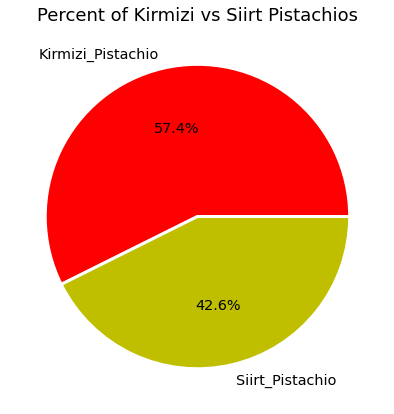

In [14]:
fig, pie_chart = plt.subplots(figsize=(7, 7))
pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

pie_chart.pie(pistachio_counts, labels = pistachio_labels, colors = colours, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

pie_chart.set_title('Percent of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()

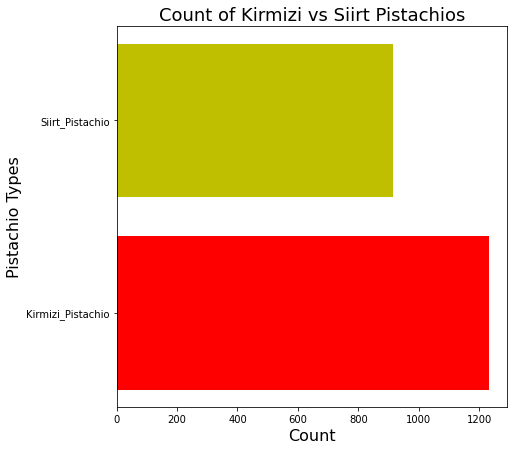

In [15]:
fig, bar_graph = plt.subplots(figsize=(7,7))

pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

bar_graph.barh(pistachio_labels, pistachio_counts, label = pistachio_labels, color = colours)

bar_graph.set_ylabel('Pistachio Types', fontsize=16)
bar_graph.set_xlabel('Count', fontsize=16)
bar_graph.set_title('Count of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()


# Section 3: Feature Engineering

Our dataset has 28 features as seen in the data analysis section. 
In this section, we have defined what each feature is. 
Based on these definitions, we identified the features that we think would be most significant in differentiating the pistachios within the dataset.

#### Understanding how the numerical values for the features are acquired/calculated


<img src="features_definition.jpg"/>
Figure 6: Diagram showing how the data for the features was obtained

### Examples of Kirmizi Pistachios from the dataset
<table><tr>
    <td> <img src="Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (1).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (2).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (3).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (4).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (5).jpg" width="200"/> </td>
</tr></table>


### Examples of Siirt Pistachios from the dataset
<table><tr>
    <td> <img src="Pistachio_Image_Dataset/Siirt_Pistachio/siirt (1).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Siirt_Pistachio/siirt (2).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Siirt_Pistachio/siirt (3).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Siirt_Pistachio/siirt (4).jpg" width="200"/> </td>
    <td> <img src="Pistachio_Image_Dataset/Siirt_Pistachio/siirt (5).jpg" width="200"/> </td>
</tr></table>

### Definitions of features present in the dataset

- 'Area':This indicates the number of pixels occupied by the image. With each image being at a standard resolution of 600 px x 600 px, it adds up each non-black pixel and gets the total value per image
- 'Perimeter': Indicates the circumference of the pistachio bean in terms of pixels for the border of the image
- 'Major Axis': This is the longest line that can be drawn within the pistachio which is the diameter going through the center of the bean.
- 'Minor Axis':Relative to the Major axis of the bean, the minor axis  is perpendicular to the major axis and takes the diameter of the bean 90 degrees from the major
- 'Eccentricity': Relative to a circle, this measures how much a shape is warped. Due to the nature of the shape of pistachios resembling ellipses, it measures the image outline relative to a circle
- 'Equivalent Diameter': Defined as 4 times the Area of the Pistachio over Pi all rooted 
- 'Solidity': This measures the extent at which the Pistachio in the image is considered to be either concave or convex
- 'Convex Area': The area in which any two points within the Pistachio bean can be connected by a continuous line that resides within the image.
- 'Extent': A/Ab *Ab = Bounding Rectangle Area – The area of the Pistachio Bean divided by a bounding Rectangle that encompasses the bean
- 'Aspect Ratio': A ratio defined by the Major axis and the minor axis relative to one another of the bean. (Major Axis / Minor Axis)
- 'Roundness': Defined as the ratio of the surface area of the Pistachio bean to the Major axis diameter as the area of a circle
- 'Compactness': Defined as the ratio of the area of the Pistachio bean to a circle with the same perimeter of the bean.
- 'Shapefactor_1': Defined as the ratio of the Major axis relative to the Area of the Pistachio bean
- 'Shapefactor_2': Defined as the ratio of the Minor axis relative to the Area of the Pistachio bean
- 'Shapefactor_3': Defined as the ratio of the Area of the pistachio relative to the area of a circle with the major axis as the diameter
- 'Shapefactor_4': Defined as the ratio of the Area of the Pistachio relative to the area of the curved surface in a cylinder
- 'Mean_RR': The average mean value of all Red pixels (from 0-255 (R,G,B)) found in the image
- 'Mean_RG' The average mean value of all Green pixels (from 0-255 (R,G,B)) found in the image
- 'Mean_RB' The average mean value of all Blue pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RR' The standard deviation value of Red pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RG' The standard deviation value of Green pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RB' The standard deviation value of Blue pixels (from 0-255 (R,G,B)) found in the image
- 'Skew_RR': Skew of the Red Pixels found in the image relative to normal distribution
- 'Skew_RG': Skew of the Green Pixels found in the image relative to normal distribution
- 'Skew_RB': Skew of the Blue Pixels found in the image relative to normal distribution
- 'Kurtosis_RR':Measure of whether Red Pixels found in the image is heavy tailed/light tailed relative to normal distribution. 
- 'Kurtosis_RG': Measure of whether Green Pixels found in the image is heavy tailed/light tailed relative to normal distribution
- 'Kurtosis_RB': Measure of whether Blue Pixels found in the image is heavy tailed/light tailed relative to normal distribution



### Attributes that we think will be useful and our reasoning:

When researching the background between the two types of Pistachios to determine any significant differences between the Siirt Pistachio and the Kirmizi Pistachio, we discovered that the size and shape factor of the Pistachio would be a discernible difference. Since the Siirt Pistachio was more round/circular in shape, it meant that all of the features that took into consideration the overall girth of the pistachio would aid in identification. From the feature list, some of the more important features would be the Minor Axis which directly measured the overall width of the Pistachio within the image in pixels. Due to the more circular shape of the Siirt Pistachio, the minor axis was identified as of great importance as well as multiple other features that used the Minor Axis in its calculations such as the Area, Aspect Ratio and the ShapeFactor_3. Apart from this, we also determined that the Eccentricity would be of great value to the identification process. This is due to Eccentricity referring to how round/flat the overall shape is. With this in mind, such a feature would aid tremendously due to the shape of the pistachios being of utmost importance to the identification process.


### Attributes that we think will not be useful and our reasoning


Between the two types of Pistachios and researching the background information of the Pistachios, at first glance the color of the Pistachio was thought to be a great indicator in differentiating the two. This is due to the naming convention in the Pistachio giving the impression that the color would make them very distinguishable. In Turkish, the translation of “Kirmizi” meant red in which the MEAN_RR feature, which was the average number of red pixels found within each image, was thought to be of great importance. This was debunked when the pistachios within the Dataset turned out to only contain the hard shell. The coloring in the naming of the Pistachios comes from the soft exterior hull otherwise known as the mesocarp in which the Kirmizi Pistachio had a more red exterior while the Siirt Pistachio had a beige/brown outer layer. Since the pistachios within the dataset only consisted of the hard shell, we determined that the features that dealt with identifying the colors within the images would not be as important in the identification.

In [16]:
# Features that we have chosen to build the model on
FEATURES_chosen = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4']


# Section 4: Encoding the features 
### Discretizing data 

We need to discretize our data for ML models that do not use continuous data. In order to discretize our data, we need to figure out how to break it down into proper categories. 

For example, we have a feature called "Area". How do we discretize that feature? What would be the best approach to divide "Area" into the correct amount of bins? 

After some research, we found about about the Freedman-Diaconis Rule which states:

bin width = $ \frac{2*IQR}{\sqrt[3]n}$

where n is the size of the data, which will be 2148 in our case. 


Using this, we can then divide (max-min) by the bin width to get number of bins needed to discretize our data.

So, for the "Area" feature we have:

IQR = 79905.500000

n = 2148

max_area = 124008.000000

min_area = 29808.000000

Then, bin width according to Freedman-Diaconis Rule would be:

area_bin_width = 12465.258

and the number of bins needed would be:

(max_area - min_area)/area_bin_width = 7.56 --> round up to 8

In [17]:
def max_min_IQR_size(col):
    # This function takes in a column name and returns 
    # it's max, min, IQR, and size from the description dataFrame
    
    return [description[col]['max'],
    description[col]['min'],
    description[col]['50%'],
    description[col]['count']]


In [18]:
def freedmanDiaconis(cols):
    # This function takes in names of the features (col names)
    # and returns the ideal number of bins it should be
    # grouped into to discretize the data according to the
    # Freedman-Diaconis Rule 
    ## note: we are taking abs of IQR as we cannot have negative bins
    ##       and some IQR values of certain features are negative  
    bins_info = {}
    for col in cols:
        info = max_min_IQR_size(col)
        maximum = info[0]
        minimum = info[1]
        IQR = info[2]
        n = info[3]
        bins_info[col] = math.ceil((maximum-minimum)/(2*abs(IQR)*(n**(-1/3))))
    return bins_info

In [19]:
bins_info = freedmanDiaconis(FEATURES_chosen)

In [20]:
bins_info

{'Area': 8,
 'Perimeter': 10,
 'Major_Axis': 4,
 'Minor_Axis': 7,
 'Eccentricity': 4,
 'Eqdiasq': 5,
 'Solidity': 3,
 'Convex_Area': 8,
 'Extent': 4,
 'Aspect_Ratio': 7,
 'Roundness': 9,
 'Compactness': 4,
 'Shapefactor_1': 11,
 'Shapefactor_2': 7,
 'Shapefactor_3': 7,
 'Shapefactor_4': 3}

In [21]:
def discretizer(cols):
    df_discretized = pd.DataFrame()
    # This function takes a list of columns and creates a new data frame
    # out of them by discretizing the given columns and adding them to 
    # a new data frame
    for col in cols:
        discretized = KBinsDiscretizer(n_bins=bins_info[col], encode='ordinal', strategy='uniform')
        discretized = discretized.fit_transform(df[[col]]).reshape(1,-1)
        df_discretized[col] = discretized[0]
    return df_discretized

In [22]:
df_discretized = discretizer(FEATURES_chosen)

In [23]:
# All the features after discretization
df_discretized

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4
0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0
1,3.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0
2,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,5.0,1.0,2.0,1.0,2.0,2.0
3,3.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0
4,4.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,4.0,1.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,2.0,7.0,2.0,1.0,1.0,4.0,2.0
2144,4.0,7.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0
2145,6.0,2.0,2.0,3.0,2.0,4.0,2.0,5.0,3.0,2.0,7.0,2.0,0.0,0.0,4.0,2.0
2146,5.0,1.0,2.0,3.0,2.0,3.0,2.0,5.0,3.0,1.0,8.0,3.0,0.0,0.0,4.0,2.0


# Section 5: Data Preparation and Cross-Validation

Our classification will be a binary classification. 
The 2 classes are "Kirmizi_Pistachio" and "Siirt_Pistachio",

We will change "Kirmizi_Pistachio" to 0 and "Siirt_Pistachio" to 1 for the sake of prediction. 





In [24]:
df['Class'] = (df['Class'].replace("Kirmizi_Pistachio", 0).replace("Siirt_Pistachio", 1))

From our data analysis step, we know that our data is imbalanced. 
57.4% of our data is made up of Kirmizi Pistachios and 42.6% of our data is made up of Siirt Pistachios. 
Moreover, we have a relatively small dataset with only 2148 rows of data.

Based on our findings for imbalanced and small datasets, the suggested method of cross-validation is the Stratified KFold Cross-Validation.


The reason that Stratified KFold Cross-Validation is suggested for imbalanced and small datasets is because it tries to automatically balance the target variable in both the training and the testing data.
ie: "The folds are made by preserving the percentage of samples for each class

In [25]:
X = df[FEATURES_chosen]
y = df[TARGET]

In [26]:
# code to visualize Stratified K Fold Split
# link in sources

cmap_data = plt.cm.autumn
cmap_cv = plt.cm.coolwarm


def plot_cv_indices(cv, X, y, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        #note, changed n_splits + 2 to n_splits + 1 here to fix error
        #not sure what was causing it as it was working fine before
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Fold",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[-50,2200]
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=30)
    return ax


def plot_cv(cv, X, y, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.1)), Patch(color = cmap_data(0)), Patch(color = cmap_data(900))],
        ["Testing set", "Training set", "Kirmizi", "Siirt"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()

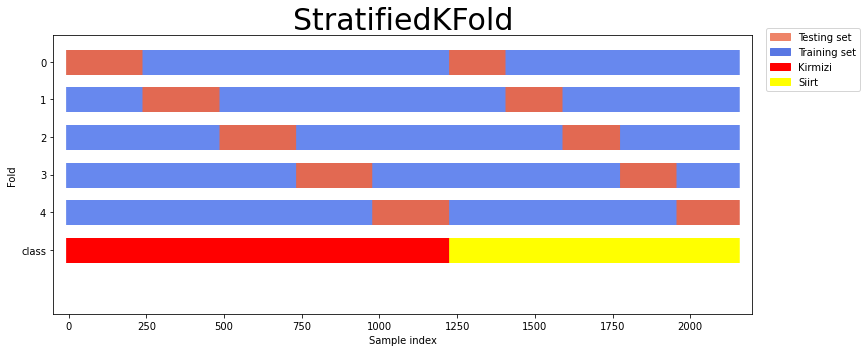

In [27]:
plot_cv(StratifiedKFold, X,y)

In [28]:
# setting stratified K Fold with 5 folds. 
skf = StratifiedKFold(n_splits=5, shuffle = False)

In [29]:
# scaling data for Logistic Regression and MLP as they benefit from it 
sc=StandardScaler()
scaler = sc.fit(X)



# Section 6 & 7 & 8: 
# Model Training & Model Testing & Precision/Recall Measures

- Naïve Bayes
- Logistic Regression
- Multi-Layer Perceptron

In [85]:
def model(classifier, data):
    fold = 0
    accuracy_scores = []
    # for loop, train_i and test_i are indices of training data and test data 
    # the indices will be determined by the stratified k fold that splits the data into 5 folds
    for train_i, test_i in skf.split(data, y):
        if ('Logistic' in str(classifier) or 'MLP' in str(classifier)):
            
            X_training = scaler.transform(data.loc[train_i])
            y_training = y.loc[train_i]
            X_testing = scaler.transform(data.loc[test_i])
            y_testing = y.loc[test_i]
        
        else:
            
            X_training = data.loc[train_i]
            y_training = y.loc[train_i]
            X_testing = data.loc[test_i]
            y_testing = y.loc[test_i]

        # Training step
        classifier.fit(X_training, y_training) 

        # Testing step
        prediction = classifier.predict(X_testing) 
        acc_score = accuracy_score(y_testing, prediction)
        print()
        print(f'======= Fold {fold} =======')
        print(f"Accuracy Score is: {acc_score*100:0.2f}%")
        accuracy_scores.append(acc_score)

        #calculating precision and recall
        macro_precision = precision_score(y_testing, prediction, average='macro')
        macro_recall = recall_score(y_testing, prediction, average='macro')
        print(f'Macro Precision score is: {macro_precision*100:0.2f}%')
        print(f'Macro Recall score is: {macro_recall*100:0.2f}%')

        micro_precision = precision_score(y_testing, prediction, average='micro')
        micro_recall = recall_score(y_testing, prediction, average='micro')
        print(f'Micro Precision score is: {micro_precision*100:0.2f}%')
        print(f'Micro Recall score is: {micro_recall*100:0.2f}%')

        # displaying confusion matrix
        cm = confusion_matrix(y_testing, prediction)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
        cm_display.plot()
        plt.show()

        print("Number of mislabeled points out of a total %d points : %d"% (X_testing.shape[0], (y_testing != prediction).sum()))
        fold +=1
    print(f'Total average score across 5 folds is: {np.mean(accuracy_scores)*100:0.2f}%')

### Confusion Matrix quadrants 
- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

### Naïve Bayes Categorical with default parameters

Note: For CategorialNB the default min_categories is None. But that resulted in code erroring out and not running after first fold, so we set the default to number of categories we have in the dataset. 


======= Fold 0 =======
Accuracy Score is: 84.88%
Macro Precision score is: 84.53%
Macro Recall score is: 85.14%
Micro Precision score is: 84.88%
Micro Recall score is: 84.88%


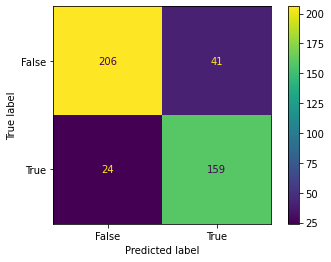

Number of mislabeled points out of a total 430 points : 65

======= Fold 1 =======
Accuracy Score is: 85.35%
Macro Precision score is: 85.14%
Macro Recall score is: 85.90%
Micro Precision score is: 85.35%
Micro Recall score is: 85.35%


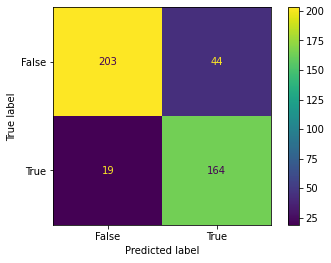

Number of mislabeled points out of a total 430 points : 63

======= Fold 2 =======
Accuracy Score is: 85.58%
Macro Precision score is: 85.43%
Macro Recall score is: 86.17%
Micro Precision score is: 85.58%
Micro Recall score is: 85.58%


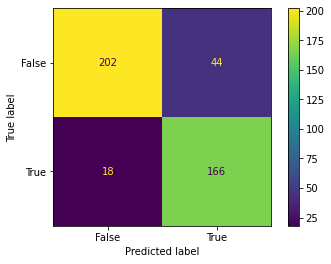

Number of mislabeled points out of a total 430 points : 62

======= Fold 3 =======
Accuracy Score is: 84.15%
Macro Precision score is: 84.37%
Macro Recall score is: 83.10%
Micro Precision score is: 84.15%
Micro Recall score is: 84.15%


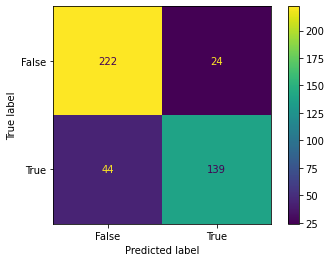

Number of mislabeled points out of a total 429 points : 68

======= Fold 4 =======
Accuracy Score is: 85.55%
Macro Precision score is: 85.17%
Macro Recall score is: 85.44%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


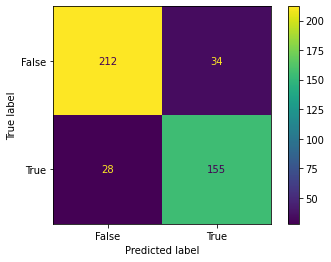

Number of mislabeled points out of a total 429 points : 62
Total average score across 5 folds is: 85.10%


In [86]:
classifier = CategoricalNB(min_categories = df_discretized.nunique())
data = df_discretized
model(classifier, data)

### Naïve Bayes Complement with default parameters

Note: This particular type of Naive Bayes was chosen because "It is particularly suited for imbalanced data sets" which is the case for us.


======= Fold 0 =======
Accuracy Score is: 83.49%
Macro Precision score is: 83.33%
Macro Recall score is: 84.07%
Micro Precision score is: 83.49%
Micro Recall score is: 83.49%


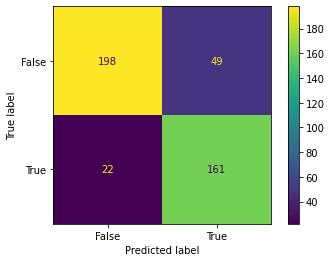

Number of mislabeled points out of a total 430 points : 71

======= Fold 1 =======
Accuracy Score is: 83.26%
Macro Precision score is: 83.49%
Macro Recall score is: 84.22%
Micro Precision score is: 83.26%
Micro Recall score is: 83.26%


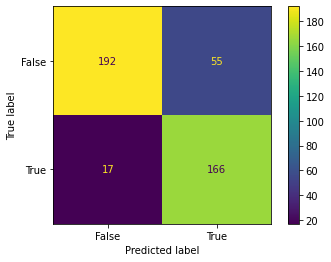

Number of mislabeled points out of a total 430 points : 72

======= Fold 2 =======
Accuracy Score is: 84.42%
Macro Precision score is: 84.65%
Macro Recall score is: 85.35%
Micro Precision score is: 84.42%
Micro Recall score is: 84.42%


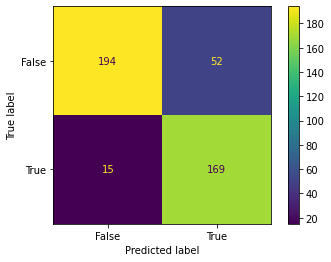

Number of mislabeled points out of a total 430 points : 67

======= Fold 3 =======
Accuracy Score is: 84.15%
Macro Precision score is: 83.83%
Macro Recall score is: 83.73%
Micro Precision score is: 84.15%
Micro Recall score is: 84.15%


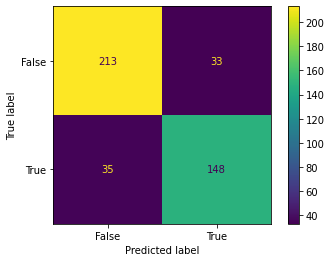

Number of mislabeled points out of a total 429 points : 68

======= Fold 4 =======
Accuracy Score is: 86.01%
Macro Precision score is: 85.72%
Macro Recall score is: 86.41%
Micro Precision score is: 86.01%
Micro Recall score is: 86.01%


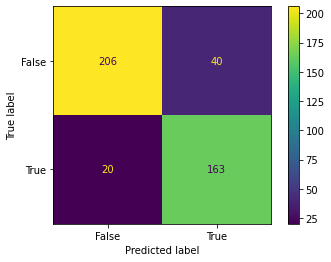

Number of mislabeled points out of a total 429 points : 60
Total average score across 5 folds is: 84.27%


In [87]:
classifier = ComplementNB()
data = df_discretized
model(classifier, data)

### Logistic Regression with default parameters



======= Fold 0 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.94%
Macro Recall score is: 86.88%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


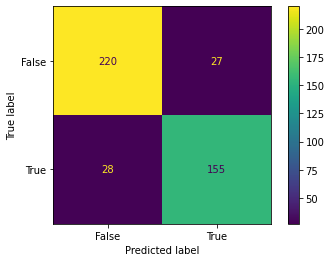

Number of mislabeled points out of a total 430 points : 55

======= Fold 1 =======
Accuracy Score is: 88.14%
Macro Precision score is: 87.80%
Macro Recall score is: 88.05%
Micro Precision score is: 88.14%
Micro Recall score is: 88.14%


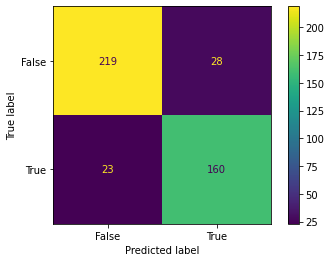

Number of mislabeled points out of a total 430 points : 51

======= Fold 2 =======
Accuracy Score is: 85.81%
Macro Precision score is: 85.50%
Macro Recall score is: 86.09%
Micro Precision score is: 85.81%
Micro Recall score is: 85.81%


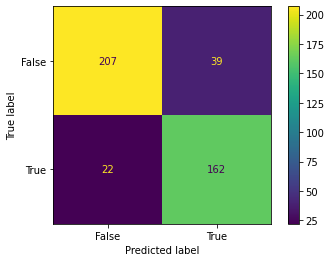

Number of mislabeled points out of a total 430 points : 61

======= Fold 3 =======
Accuracy Score is: 85.55%
Macro Precision score is: 86.58%
Macro Recall score is: 84.11%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


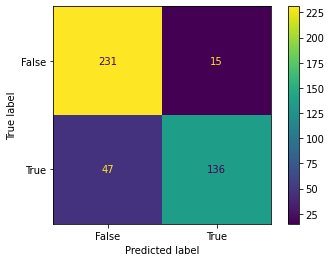

Number of mislabeled points out of a total 429 points : 62

======= Fold 4 =======
Accuracy Score is: 88.34%
Macro Precision score is: 88.05%
Macro Recall score is: 88.16%
Micro Precision score is: 88.34%
Micro Recall score is: 88.34%


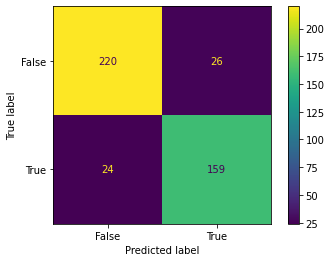

Number of mislabeled points out of a total 429 points : 50
Total average score across 5 folds is: 87.01%


In [88]:
classifier = LogisticRegression()
data = X
model(classifier, data)

### Multi-Layer Perceptron with default parameters


======= Fold 0 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.98%
Macro Recall score is: 86.81%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


/Users/muko/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


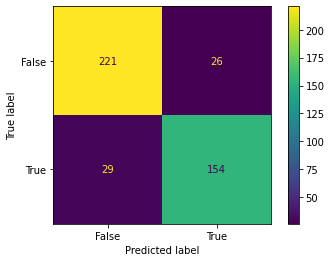

Number of mislabeled points out of a total 430 points : 55

======= Fold 1 =======
Accuracy Score is: 89.07%
Macro Precision score is: 88.80%
Macro Recall score is: 88.86%
Micro Precision score is: 89.07%
Micro Recall score is: 89.07%


/Users/muko/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


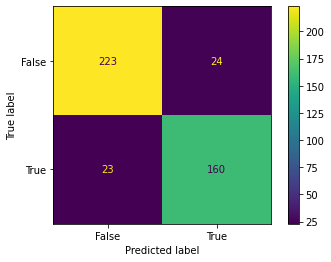

Number of mislabeled points out of a total 430 points : 47

======= Fold 2 =======
Accuracy Score is: 86.98%
Macro Precision score is: 86.63%
Macro Recall score is: 87.11%
Micro Precision score is: 86.98%
Micro Recall score is: 86.98%


/Users/muko/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


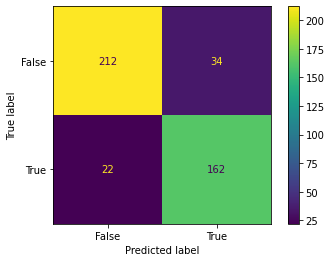

Number of mislabeled points out of a total 430 points : 56

======= Fold 3 =======
Accuracy Score is: 86.95%
Macro Precision score is: 87.82%
Macro Recall score is: 85.68%
Micro Precision score is: 86.95%
Micro Recall score is: 86.95%


/Users/muko/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


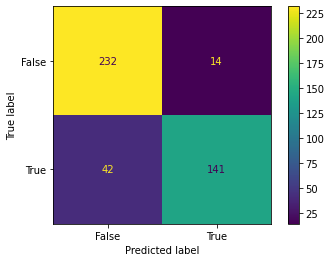

Number of mislabeled points out of a total 429 points : 56

======= Fold 4 =======
Accuracy Score is: 88.11%
Macro Precision score is: 87.80%
Macro Recall score is: 87.95%
Micro Precision score is: 88.11%
Micro Recall score is: 88.11%


/Users/muko/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


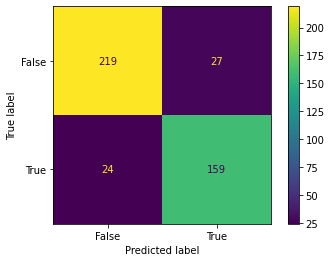

Number of mislabeled points out of a total 429 points : 51
Total average score across 5 folds is: 87.66%


In [89]:
classifier = MLPClassifier()
data = X
model(classifier, data)

# Section 9: Section 6 & 7 & 8 with Modified Parameters


## Naïve Bayes 
The default fit_prior is True. This takes into a consideration the imbalance in classes. 
Here, we change it to False for both the Naïve Bayes classifiers as we wanted to see how much of an affect the imbalance in our data would have on the outcome, if any at all.

### Categorical with Modified Parameters


======= Fold 0 =======
Accuracy Score is: 84.42%
Macro Precision score is: 84.13%
Macro Recall score is: 84.81%
Micro Precision score is: 84.42%
Micro Recall score is: 84.42%


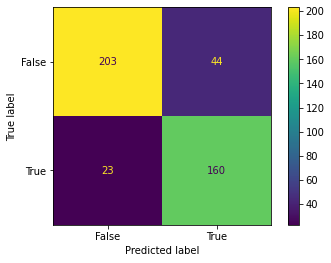

Number of mislabeled points out of a total 430 points : 67

======= Fold 1 =======
Accuracy Score is: 85.58%
Macro Precision score is: 85.52%
Macro Recall score is: 86.32%
Micro Precision score is: 85.58%
Micro Recall score is: 85.58%


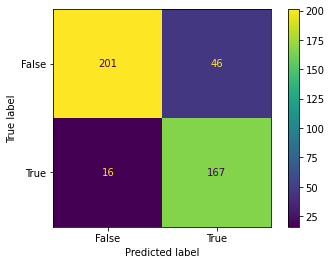

Number of mislabeled points out of a total 430 points : 62

======= Fold 2 =======
Accuracy Score is: 85.12%
Macro Precision score is: 85.08%
Macro Recall score is: 85.83%
Micro Precision score is: 85.12%
Micro Recall score is: 85.12%


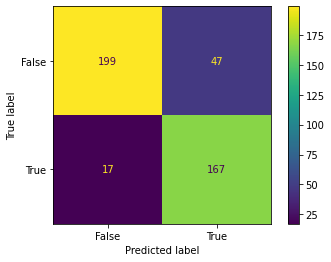

Number of mislabeled points out of a total 430 points : 64

======= Fold 3 =======
Accuracy Score is: 84.38%
Macro Precision score is: 84.49%
Macro Recall score is: 83.44%
Micro Precision score is: 84.38%
Micro Recall score is: 84.38%


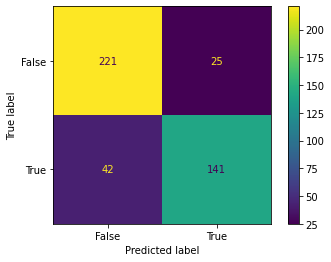

Number of mislabeled points out of a total 429 points : 67

======= Fold 4 =======
Accuracy Score is: 85.55%
Macro Precision score is: 85.17%
Macro Recall score is: 85.44%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


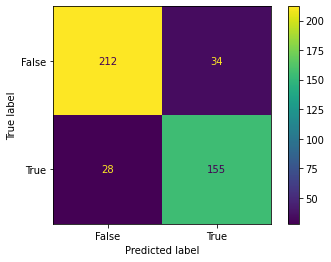

Number of mislabeled points out of a total 429 points : 62
Total average score across 5 folds is: 85.01%


In [102]:
classifier = CategoricalNB(min_categories = df_discretized.nunique(), fit_prior = False)
data = df_discretized
model(classifier, data)

### Complement with Modified Parameters


======= Fold 0 =======
Accuracy Score is: 83.49%
Macro Precision score is: 83.33%
Macro Recall score is: 84.07%
Micro Precision score is: 83.49%
Micro Recall score is: 83.49%


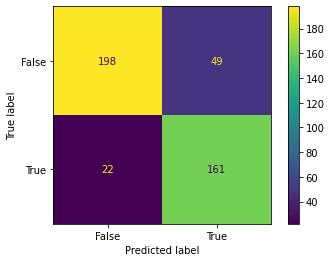

Number of mislabeled points out of a total 430 points : 71

======= Fold 1 =======
Accuracy Score is: 83.26%
Macro Precision score is: 83.49%
Macro Recall score is: 84.22%
Micro Precision score is: 83.26%
Micro Recall score is: 83.26%


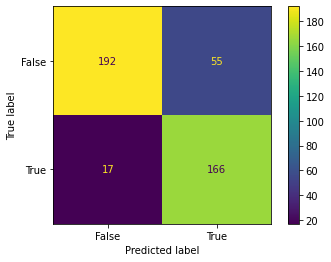

Number of mislabeled points out of a total 430 points : 72

======= Fold 2 =======
Accuracy Score is: 84.42%
Macro Precision score is: 84.65%
Macro Recall score is: 85.35%
Micro Precision score is: 84.42%
Micro Recall score is: 84.42%


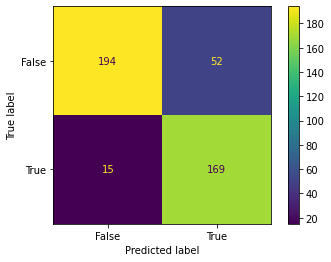

Number of mislabeled points out of a total 430 points : 67

======= Fold 3 =======
Accuracy Score is: 84.15%
Macro Precision score is: 83.83%
Macro Recall score is: 83.73%
Micro Precision score is: 84.15%
Micro Recall score is: 84.15%


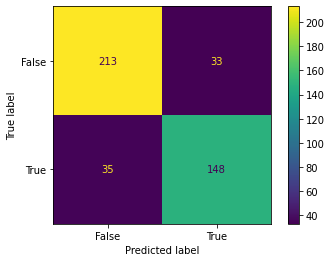

Number of mislabeled points out of a total 429 points : 68

======= Fold 4 =======
Accuracy Score is: 86.01%
Macro Precision score is: 85.72%
Macro Recall score is: 86.41%
Micro Precision score is: 86.01%
Micro Recall score is: 86.01%


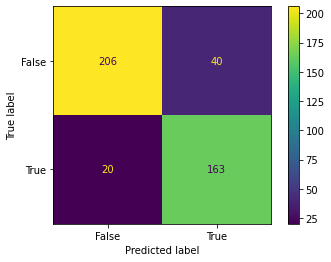

Number of mislabeled points out of a total 429 points : 60
Total average score across 5 folds is: 84.27%


In [103]:
classifier = ComplementNB(fit_prior = False)
data = df_discretized
model(classifier, data)

### Logistic Regression with Modified Parameters

penalty parameters default is L2, we will change this to L1 since ours is a binary classification and L2 error is not recommended for binary classification, we will also use elasticnet which uses both L1 and L2 to see if using L1 and L2 error equally has an affect on the outcome.

Changing solver to 'saga' as that is the only ones that will work with L1 and elasticnet

Through trial and error, max_iter set to 4000 as that's when convergence warning no longer shows up 

In [92]:
data = X


======= Fold 0 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.94%
Macro Recall score is: 86.88%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


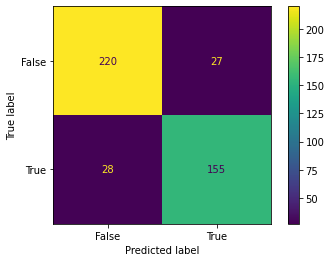

Number of mislabeled points out of a total 430 points : 55

======= Fold 1 =======
Accuracy Score is: 88.37%
Macro Precision score is: 88.03%
Macro Recall score is: 88.32%
Micro Precision score is: 88.37%
Micro Recall score is: 88.37%


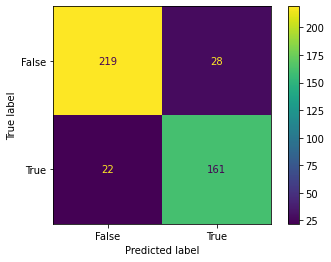

Number of mislabeled points out of a total 430 points : 50

======= Fold 2 =======
Accuracy Score is: 85.81%
Macro Precision score is: 85.50%
Macro Recall score is: 86.09%
Micro Precision score is: 85.81%
Micro Recall score is: 85.81%


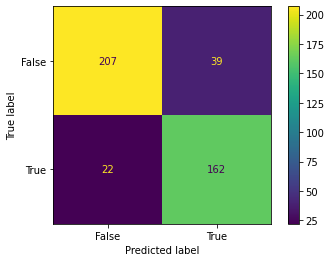

Number of mislabeled points out of a total 430 points : 61

======= Fold 3 =======
Accuracy Score is: 85.55%
Macro Precision score is: 86.58%
Macro Recall score is: 84.11%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


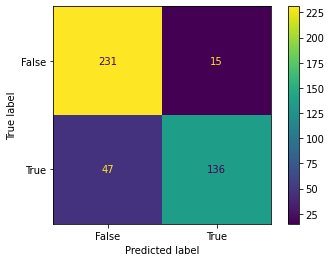

Number of mislabeled points out of a total 429 points : 62

======= Fold 4 =======
Accuracy Score is: 89.04%
Macro Precision score is: 88.75%
Macro Recall score is: 88.91%
Micro Precision score is: 89.04%
Micro Recall score is: 89.04%


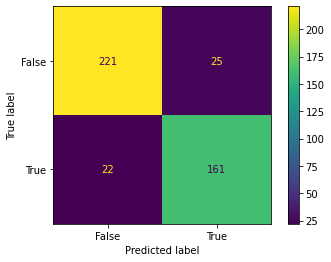

Number of mislabeled points out of a total 429 points : 47
Total average score across 5 folds is: 87.20%


In [93]:
classifier = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 4000)
model(classifier, data)


======= Fold 0 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.94%
Macro Recall score is: 86.88%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


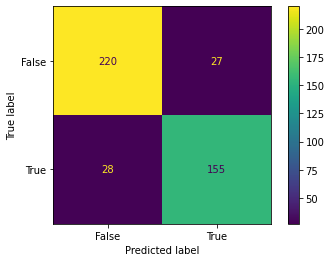

Number of mislabeled points out of a total 430 points : 55

======= Fold 1 =======
Accuracy Score is: 88.14%
Macro Precision score is: 87.80%
Macro Recall score is: 88.05%
Micro Precision score is: 88.14%
Micro Recall score is: 88.14%


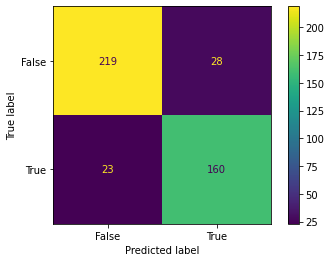

Number of mislabeled points out of a total 430 points : 51

======= Fold 2 =======
Accuracy Score is: 85.81%
Macro Precision score is: 85.50%
Macro Recall score is: 86.09%
Micro Precision score is: 85.81%
Micro Recall score is: 85.81%


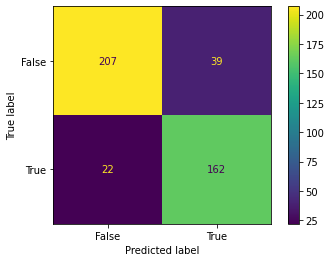

Number of mislabeled points out of a total 430 points : 61

======= Fold 3 =======
Accuracy Score is: 85.55%
Macro Precision score is: 86.58%
Macro Recall score is: 84.11%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


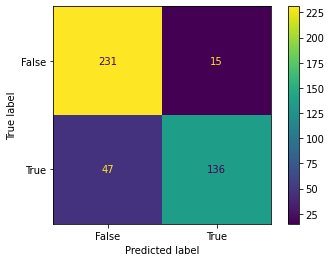

Number of mislabeled points out of a total 429 points : 62

======= Fold 4 =======
Accuracy Score is: 88.58%
Macro Precision score is: 88.31%
Macro Recall score is: 88.36%
Micro Precision score is: 88.58%
Micro Recall score is: 88.58%


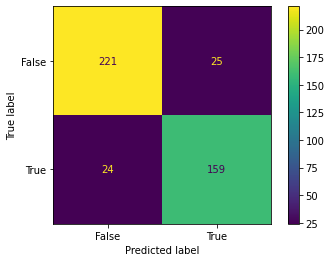

Number of mislabeled points out of a total 429 points : 49
Total average score across 5 folds is: 87.06%


In [94]:
classifier = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 4000)
model(classifier, data)

### Multi-Layer Perceptron with Modified Parameters

default solver is 'adam', modified to 'lbfgs' as its supposed to work better with small datasets (according to the sklearn MLP documentaion) like ours.

default activation is 'relu', modified to 'tanh' and 'identity' to see the difference between the two

default max_iter to convergence is 200. With default value, convergance wasn't being reached. changed to 300.

In [106]:
data = X


======= Fold 0 =======
Accuracy Score is: 83.49%
Macro Precision score is: 83.10%
Macro Recall score is: 83.15%
Micro Precision score is: 83.49%
Micro Recall score is: 83.49%


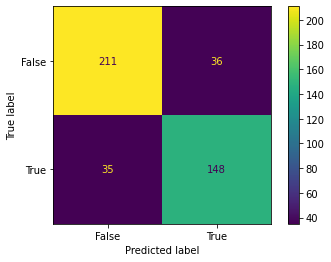

Number of mislabeled points out of a total 430 points : 71

======= Fold 1 =======
Accuracy Score is: 84.19%
Macro Precision score is: 83.79%
Macro Recall score is: 83.97%
Micro Precision score is: 84.19%
Micro Recall score is: 84.19%


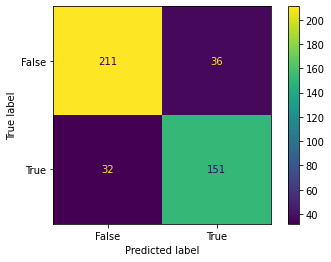

Number of mislabeled points out of a total 430 points : 68

======= Fold 2 =======
Accuracy Score is: 81.63%
Macro Precision score is: 81.24%
Macro Recall score is: 81.68%
Micro Precision score is: 81.63%
Micro Recall score is: 81.63%


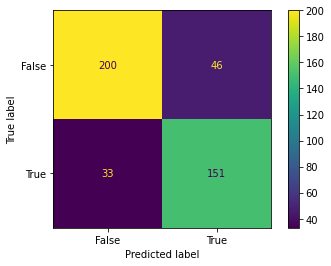

Number of mislabeled points out of a total 430 points : 79

======= Fold 3 =======
Accuracy Score is: 81.82%
Macro Precision score is: 82.06%
Macro Recall score is: 80.58%
Micro Precision score is: 81.82%
Micro Recall score is: 81.82%


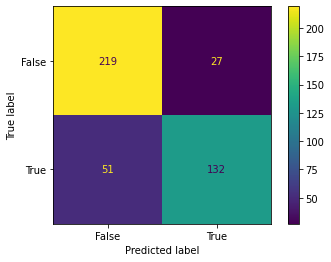

Number of mislabeled points out of a total 429 points : 78

======= Fold 4 =======
Accuracy Score is: 81.59%
Macro Precision score is: 81.15%
Macro Recall score is: 81.42%
Micro Precision score is: 81.59%
Micro Recall score is: 81.59%


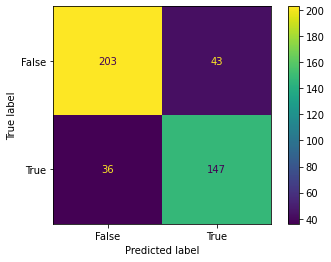

Number of mislabeled points out of a total 429 points : 79
Total average score across 5 folds is: 82.54%


In [110]:
classifier = MLPClassifier(solver = 'lbfgs', activation = 'tanh', max_iter = 400)
model(classifier, data)


======= Fold 0 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.94%
Macro Recall score is: 86.88%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


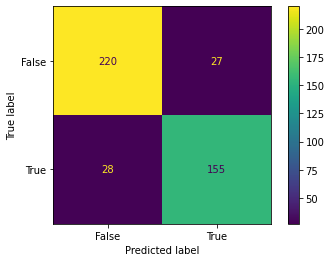

Number of mislabeled points out of a total 430 points : 55

======= Fold 1 =======
Accuracy Score is: 89.07%
Macro Precision score is: 88.89%
Macro Recall score is: 88.72%
Micro Precision score is: 89.07%
Micro Recall score is: 89.07%


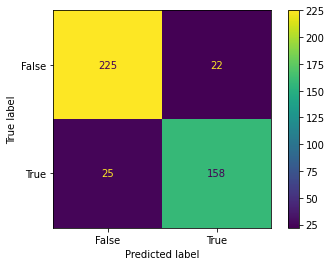

Number of mislabeled points out of a total 430 points : 47

======= Fold 2 =======
Accuracy Score is: 87.21%
Macro Precision score is: 86.88%
Macro Recall score is: 87.45%
Micro Precision score is: 87.21%
Micro Recall score is: 87.21%


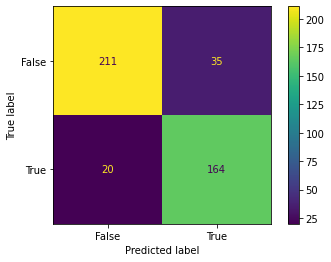

Number of mislabeled points out of a total 430 points : 55

======= Fold 3 =======
Accuracy Score is: 85.55%
Macro Precision score is: 86.58%
Macro Recall score is: 84.11%
Micro Precision score is: 85.55%
Micro Recall score is: 85.55%


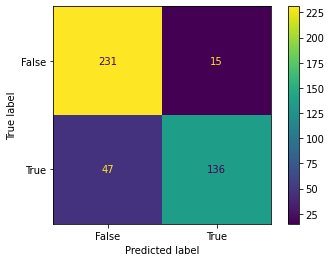

Number of mislabeled points out of a total 429 points : 62

======= Fold 4 =======
Accuracy Score is: 89.28%
Macro Precision score is: 89.01%
Macro Recall score is: 89.11%
Micro Precision score is: 89.28%
Micro Recall score is: 89.28%


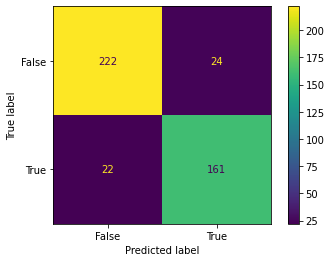

Number of mislabeled points out of a total 429 points : 46
Total average score across 5 folds is: 87.66%


In [109]:
classifier = MLPClassifier(solver = 'lbfgs', activation = 'identity', max_iter = 400)
model(classifier, data)

# Section 10: Results

### Part A: Quantitative Comparison of 9 results

With default parameters:
- Naïve Bayes Categorical average accuracy score across the 5 folds was 85.10%
- Naïve Bayes Complement average accuracy score across the 5 folds was 84.27%
- Logistic Regression average accuracy score across the 5 folds was 87.01%
- MLP average accuracy score across the 5 folds was 87.66%

Overall, with default parameters, the best performers have been MLP and Logistic Regression classifiers. 


With changed parameters: 
- For the Naïve Bayes classifiers, the fit_prior was changed to see the affect of imbalanced data on the accuracy score. 
    - For Categorical classifier, there was a very small change of -0.09%, bringing down the accuracy score to 85.01%. 
    - For the Complement classifier, there was no change at all and so the accuracy score stayed at 84.27%. 
   
   - There was no change or very small change in accuracy scores. This likely implies that the StratifiedKFold performed on the data was effective and did a good job of balancing the training/testing sets. 

- For the Logistic Regression classifier, the solver was set to "saga", max_iter was set to 4000, and 2 instances of penalty was tested, namely 'L1' and 'elasticnet'. We used "saga" as it is the only solver that allows the use of penalty = "elasticnet", which allows us to use both L1 and L2 error in combination. max_iter was set to 4000 through trial and error to get rid of the Convergence Error due to max number of iterations reached. 
    - When using L1 error, there was a slight improvement of 0.19%, bringing up the accuracy score to  87.20%
    - When using elasticnet, there was a very small improvement of 0.05%, bringing up the accuracy score to 87.06%
  - The greater improvement in using L1 error as opposed to combination of L1 and L2 error or just L2 error likely implies that L1 error really is better for binary classification. With a larger dataset there might be more significant results. 
  
- For the MLP classifier, the solver was set to "lgbfs", max_iter was set to 400, and 2 instances of activation was tested, namely "tanh" and "identity". We used "lgbfs" as it is supposed to work better with smaller datasets like ours, max_iter was set to 400 through trial and error to get rid of the Convergence Error due to max number of iterations reached. 
   - When using "tanh" activation with "lgbfs" solver, there was significant change of -5.12%, bringing down the accuracy score to 82.54%.
   - When using "identity" activation with "lgbfs" solver, there was no change, and so the accuracy score stayed at 87.66%.
  - The significant decrease on accuracy score when using lgbfs and tanh, and the no change in score when using lgbfs and identity likely implies that lgbfs is not the best solver to use for our dataset
  
Overall, with changed parameters, the best performer has been the Logistic Regression classifier. 

Given the choice, it would make most sense to pick Logistic Regression for this dataset, as it is generally known to be the go to choice for binary classification. 

### Part B: Examples of Good and Bad Results

# Sources

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset


### Citations requested by the owner of the dataset: 

OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686. (Open Access) https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178

SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access)

### Sources used for different models:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html

### Sources used to calculate bin sized for data discretization:
https://en.wikipedia.org/wiki/Freedman–Diaconis_rule

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram



### Sources used for Cross Validation:
https://www.youtube.com/watch?v=-8s9KuNo5SA

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

### Sources used for general pistachio information:
https://en.wikipedia.org/wiki/Pistachio

### Sources used for pictures/figures:
Figure 1: https://www.dagtarimsaldanismanlik.com/antep-fistigi-gubreleme.html

Figure 2: https://www.hepsiburada.com/plantistanbul-antep-fistigi-fidani-60-80-cm-saksida-pm-HB00000O53UC

Figure 3: http://biodels.com/content/pistachio-kernels 

Figure 4: https://www.fidandeposu.com/siirt-cesidi-antep-fistigi-fidani

Figure 5: https://www.fidandeposu.com/kirmizi-cesidi-antep-fistigi-fidani

Figure 6: https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178